An Qi Ma

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
plt.style.use('ggplot')

In [3]:
# earthquakes dataframe
earthquakes = pd.read_csv('all_month.csv')
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-02-09T23:43:58.240Z,33.151165,-116.445503,12.26,1.40,ml,40.0,52.0,0.1191,0.21,...,2017-02-09T23:46:02.293Z,"13km SSW of Borrego Springs, CA",earthquake,0.32,0.91,0.281,6.0,automatic,ci,ci
1,2017-02-09T23:31:17.679Z,61.219600,-150.818300,50.20,2.30,ml,NaN,NaN,NaN,0.62,...,2017-02-09T23:44:57.739Z,"49km W of Anchorage, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
2,2017-02-09T22:49:09.200Z,38.811333,-122.826332,1.69,0.73,md,9.0,145.0,0.0175,0.07,...,2017-02-09T23:06:07.717Z,"7km WNW of The Geysers, California",earthquake,0.44,0.54,0.060,3.0,automatic,nc,nc
3,2017-02-09T22:35:50.474Z,59.714800,-152.318200,67.70,1.60,ml,NaN,NaN,NaN,0.19,...,2017-02-09T22:45:10.427Z,"28km WSW of Anchor Point, Alaska",earthquake,NaN,1.20,NaN,NaN,automatic,ak,ak
4,2017-02-09T22:23:10.640Z,35.992833,-116.082833,2.46,2.31,ml,17.0,100.0,0.1817,0.16,...,2017-02-09T22:38:59.517Z,"17km E of Shoshone, CA",earthquake,0.23,0.96,0.140,24.0,reviewed,ci,ci


In [160]:
# tsunamis dataframe
tsunamis = pd.read_excel('tsevent.xlsx')
tsunamis.head()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,1,-2000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
1,3,-1610,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2,4,-1365,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,5,-1300,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,-760,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

In [6]:
earthquakes.columns.values

array(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'], dtype=object)

In [7]:
tsunamis.columns.values

array([u'ID', u'YEAR', u'MONTH', u'DAY', u'HOUR', u'MINUTE', u'SECOND',
       u'EVENT_VALIDITY', u'CAUSE_CODE', u'FOCAL_DEPTH',
       u'PRIMARY_MAGNITUDE', u'COUNTRY', u'STATE', u'LOCATION_NAME',
       u'LATITUDE', u'LONGITUDE', u'REGION_CODE', u'MAXIMUM_WATER_HEIGHT',
       u'ABE', u'IIDA', u'SOLOVIEV', u'WARNING_STATUS', u'DEATHS',
       u'DEATHS_DESCRIPTION', u'MISSING', u'MISSING_DESCRIPTION',
       u'INJURIES', u'INJURIES_DESCRIPTION', u'DAMAGE_MILLIONS_DOLLARS',
       u'DAMAGE_DESCRIPTION', u'HOUSES_DESTROYED',
       u'HOUSES_DESTROYED_DESCRIPTION', u'HOUSES_DAMAGED',
       u'HOUSES_DAMAGED_DESCRIPTION', u'TOTAL_DEATHS',
       u'TOTAL_DEATHS_DESCRIPTION', u'TOTAL_MISSING',
       u'TOTAL_MISSING_DESCRIPTION', u'TOTAL_INJURIES',
       u'TOTAL_INJURIES_DESCRIPTION', u'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       u'TOTAL_DAMAGE_DESCRIPTION', u'TOTAL_HOUSES_DESTROYED',
       u'TOTAL_HOUSES_DESTROYED_DESCRIPTION', u'TOTAL_HOUSES_DAMAGED',
       u'TOTAL_HOUSES_DAMAGED_DESCRIPTIO

In [161]:
# delete unnecessary columns
tsunamis.drop(tsunamis.columns[[range(22,46)]], inplace = True, axis = 1)

In [162]:
tsunamis.head()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,...,STATE,LOCATION_NAME,LATITUDE,LONGITUDE,REGION_CODE,MAXIMUM_WATER_HEIGHT,ABE,IIDA,SOLOVIEV,WARNING_STATUS
0,1,-2000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,SYRIAN COASTS,35.683,35.80,50.0,NaN,NaN,NaN,6.0,NaN
1,3,-1610,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,...,NaN,THERA ISLAND (SANTORINI),36.400,25.40,50.0,90.0,NaN,NaN,6.0,NaN
2,4,-1365,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,SYRIAN COASTS,35.683,35.80,50.0,NaN,NaN,NaN,6.0,NaN
3,5,-1300,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,"IONIAN COASTS, TROAD",39.960,26.24,50.0,NaN,NaN,NaN,5.0,NaN
4,6,-760,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,ISRAEL AND LEBANON COASTS,NaN,NaN,50.0,NaN,NaN,NaN,3.0,NaN


In [10]:
print earthquakes['mag'].max(), earthquakes['mag'].min()

7.9 -0.8


In [11]:
# small earthquake df
smallearthquakes = earthquakes.loc[earthquakes['mag'] < 2.0]
smallearthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-02-09T23:43:58.240Z,33.151165,-116.445503,12.26,1.40,ml,40.0,52.0,0.11910,0.21,...,2017-02-09T23:46:02.293Z,"13km SSW of Borrego Springs, CA",earthquake,0.32,0.91,0.281,6.0,automatic,ci,ci
2,2017-02-09T22:49:09.200Z,38.811333,-122.826332,1.69,0.73,md,9.0,145.0,0.01750,0.07,...,2017-02-09T23:06:07.717Z,"7km WNW of The Geysers, California",earthquake,0.44,0.54,0.060,3.0,automatic,nc,nc
3,2017-02-09T22:35:50.474Z,59.714800,-152.318200,67.70,1.60,ml,NaN,NaN,NaN,0.19,...,2017-02-09T22:45:10.427Z,"28km WSW of Anchor Point, Alaska",earthquake,NaN,1.20,NaN,NaN,automatic,ak,ak
5,2017-02-09T22:18:08.150Z,61.643700,-151.027200,66.80,1.60,ml,NaN,NaN,NaN,0.63,...,2017-02-09T22:32:48.566Z,"53km WSW of Willow, Alaska",earthquake,NaN,1.00,NaN,NaN,automatic,ak,ak
7,2017-02-09T22:03:13.940Z,33.483167,-116.462500,7.57,0.86,ml,23.0,84.0,0.09365,0.14,...,2017-02-09T22:32:01.751Z,"21km ESE of Anza, CA",earthquake,0.22,0.83,0.116,16.0,reviewed,ci,ci


In [12]:
len(smallearthquakes.index)

6245

In [13]:
# big earthquake df
bigearthquakes = earthquakes.loc[earthquakes['mag'] > 5.0]
bigearthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
20,2017-02-09T19:10:11.240Z,-57.2293,-150.7983,10.00,5.2,mb,NaN,41.0,27.811,1.06,...,2017-02-09T20:17:16.040Z,Pacific-Antarctic Ridge,earthquake,15.2,1.8,0.099,34.0,reviewed,us,us
135,2017-02-09T02:21:52.570Z,-2.3066,140.7876,35.00,5.1,mb,NaN,61.0,8.551,1.14,...,2017-02-09T04:18:47.279Z,"26km NNE of Jayapura, Indonesia",earthquake,9.7,2.0,0.112,26.0,reviewed,us,us
145,2017-02-09T00:50:30.670Z,-15.0664,-73.9888,72.99,5.1,mb,NaN,142.0,4.131,1.07,...,2017-02-09T18:21:00.040Z,"22km W of Coracora, Peru",earthquake,7.7,7.8,0.039,212.0,reviewed,us,us
245,2017-02-08T13:44:32.990Z,-41.5886,-83.8056,10.00,5.4,mb,NaN,166.0,7.618,1.15,...,2017-02-08T16:38:44.040Z,West Chile Rise,earthquake,7.0,1.9,0.044,174.0,reviewed,us,us
268,2017-02-08T11:02:37.490Z,25.1249,63.3072,10.00,5.2,mb,NaN,66.0,6.445,0.95,...,2017-02-08T11:22:42.040Z,"22km SW of Pasni, Pakistan",earthquake,9.6,1.9,0.047,148.0,reviewed,us,us


In [14]:
len(bigearthquakes.index)

91

In [175]:
# Drop N/A lon/lat values for tsunami
# I filtered with longitude because if longitude has N/A, corresponding latitude also has it
tsu = tsunamis.loc[np.isnan(tsunamis[u'LONGITUDE']) == False]
tsu

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,...,STATE,LOCATION_NAME,LATITUDE,LONGITUDE,REGION_CODE,MAXIMUM_WATER_HEIGHT,ABE,IIDA,SOLOVIEV,WARNING_STATUS
0,1,-2000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,SYRIAN COASTS,35.683,35.800,50.0,NaN,NaN,NaN,6.0,NaN
1,3,-1610,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,...,NaN,THERA ISLAND (SANTORINI),36.400,25.400,50.0,90.00,NaN,NaN,6.0,NaN
2,4,-1365,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,SYRIAN COASTS,35.683,35.800,50.0,NaN,NaN,NaN,6.0,NaN
3,5,-1300,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,"IONIAN COASTS, TROAD",39.960,26.240,50.0,NaN,NaN,NaN,5.0,NaN
5,7,-590,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,LEBANON COASTS,33.270,35.220,50.0,NaN,NaN,NaN,6.0,NaN
6,8,-525,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,LEBANON COASTS,33.560,35.370,50.0,NaN,NaN,NaN,3.0,NaN
7,3469,-480,9.0,29.0,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,SARONIC GULF,37.900,23.500,50.0,NaN,NaN,NaN,NaN,NaN
8,9,-479,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NORTH AEGEAN,39.700,23.300,50.0,NaN,NaN,NaN,3.0,NaN
9,10,-426,6.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,...,NaN,CORINTHOS-PATRAS GULF,38.900,22.700,50.0,NaN,NaN,NaN,5.0,NaN
10,11,-373,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,...,NaN,CORINTHOS-PATRAS GULF,38.250,22.250,50.0,NaN,NaN,NaN,5.0,NaN


In [186]:
# draw world map
plt.figure(figsize=(15,10))
displaymap = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)

In [187]:
displaymap.drawmapboundary()
displaymap.drawcountries()
displaymap.drawcoastlines()

In [188]:
# Convert longitudes and latitudes to list of floats
longitude = earthquakes[['longitude']].values.tolist()
for i in range(0, len(longitude)):
    longitude[i] = float(longitude[i][0])
latitude = earthquakes[['latitude']].values.tolist()
for i in range(0, len(latitude)):
    latitude[i] = float(latitude[i][0])
tlongitude = tsu[[u'LONGITUDE']].values.tolist()
for i in range(0, len(tlongitude)):
    tlongitude[i] = float(tlongitude[i][0])
tlatitude = tsu[[u'LATITUDE']].values.tolist()
for i in range(0, len(tlatitude)):
    tlatitude[i] = float(tlatitude[i][0])

In [189]:
lons,lats = displaymap(longitude, latitude)
tlons, tlats = displaymap(tlongitude, tlatitude)
displaymap.plot(lons, lats, 'bo')
displaymap.plot(tlons, tlats, 'bo')

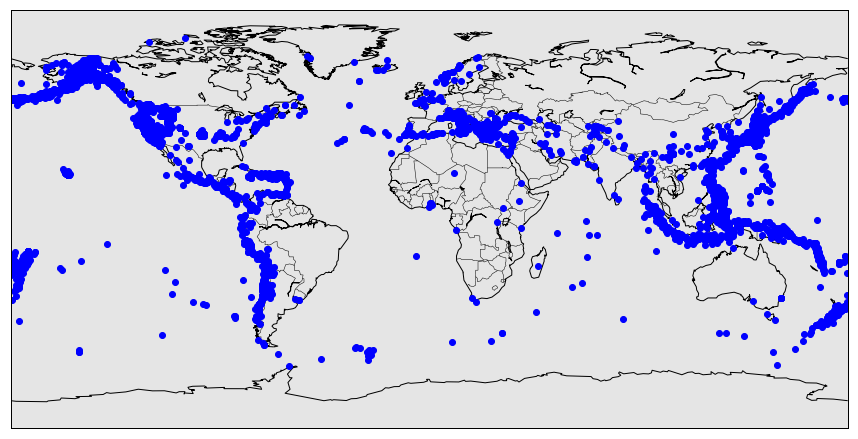

In [190]:
plt.show()